# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as sts
import math
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.maxwell.html#scipy.stats.arcsine

arcsine_rvs = sts.arcsine()

arcsine_sample_10 = arcsine_rvs.rvs(10)
arcsine_sample_100 = arcsine_rvs.rvs(100)
arcsine_sample_1000 = arcsine_rvs.rvs(1000)
arcsine_sample_10000 = arcsine_rvs.rvs(10000)

In [3]:
arcsine_mean = arcsine_rvs.mean() # настоящее среднее случайной величины 
sample_mean_10 = arcsine_sample_10.mean() # выборочное среднее 10 элементов
sample_mean_100 = arcsine_sample_100.mean() # выборочное среднее 100 элементов
sample_mean_1000 = arcsine_sample_1000.mean() # выборочное среднее 1000 элементов
sample_mean_10000 = arcsine_sample_10000.mean() # выборочное среднее 10000 элементов

print(arcsine_mean)
print(sample_mean_10)
print(sample_mean_100)
print(sample_mean_1000)
print(sample_mean_10000) # Приближается к настоящему значению

0.5
0.5140822393547306
0.4154757123285163
0.5043517872554583
0.5011146865994839


In [4]:
arcsine_var = arcsine_rvs.var() # настоящая дисперсия
sample_var_10 = arcsine_sample_10.var() # выборочная дисперсия 10 элементов
sample_var_100 = arcsine_sample_100.var() # выборочная дисперсия 100 элементов
sample_var_1000 = arcsine_sample_1000.var() # выборочная дисперсия 1000 элементов
sample_var_10000 = arcsine_sample_10000.var() # выборочная дисперсия 10000 элементов

print(arcsine_var)
print(sample_var_10)
print(sample_var_100)
print(sample_var_1000)
print(sample_var_10000) # Приближается к настоящему значению

0.125
0.10841776879733378
0.12947085214676557
0.12687581464301556
0.1243459548952262


### Постройте гистограмму выборки и теоретическую плотность распределения

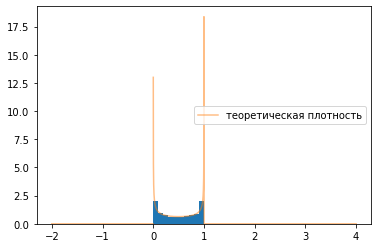

In [5]:
# ваш код тут
plt.hist(arcsine_sample_10000, density=True)
x = np.linspace(-2,4,10000)
pdf = arcsine_rvs.pdf(x) # Функция плотности вероятности в точке x
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

<class 'list'>


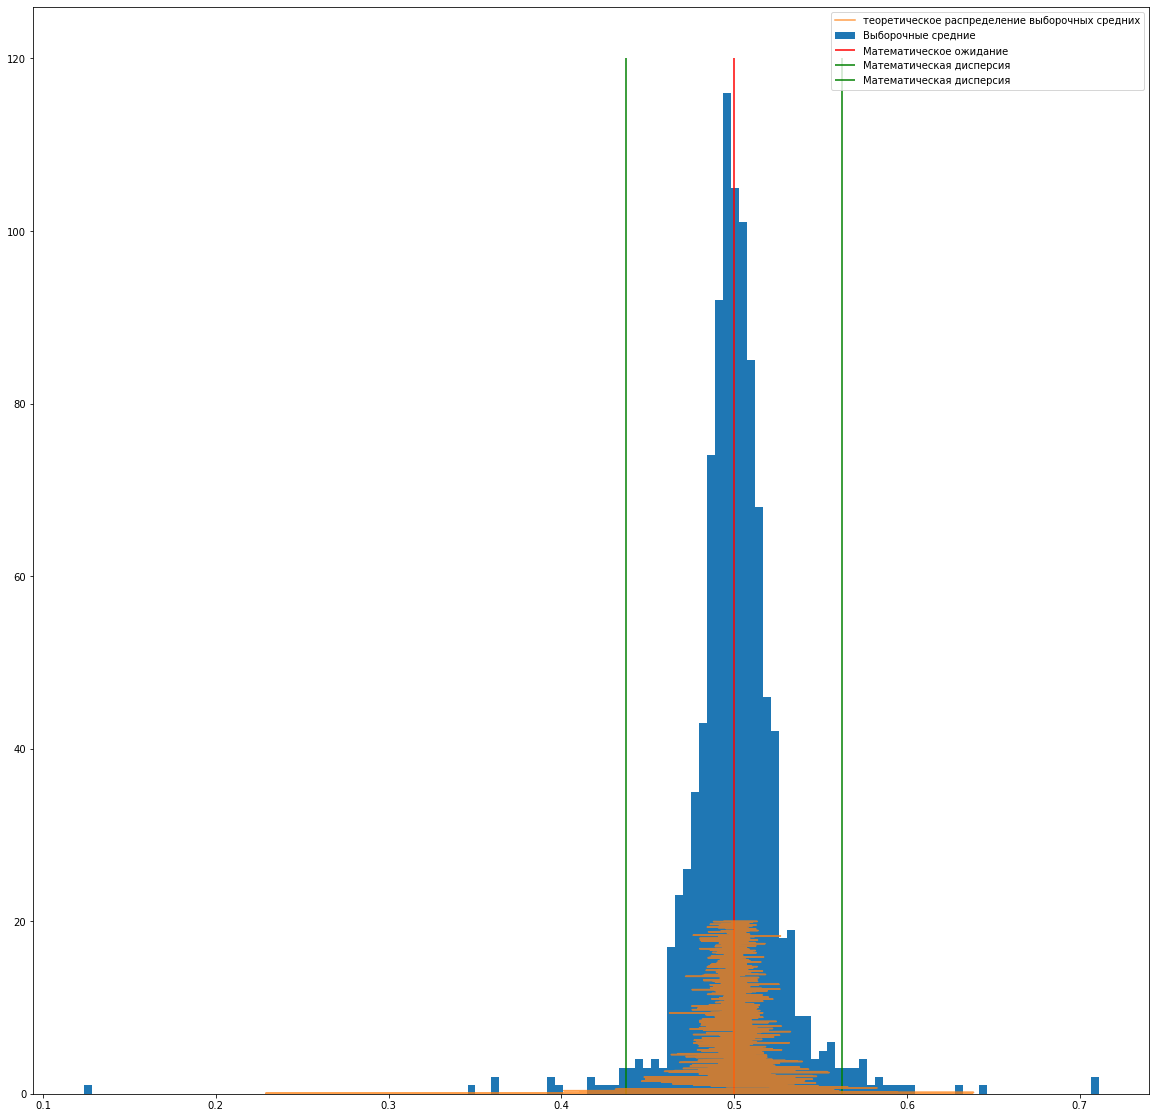

In [6]:
# ваш код тут

NN = 1000
x = np.linspace(0,20,NN)

arcsine_means = []
for i in range(NN):
    # Создаем массив выборочных средних для разного объема выборок
    arcsine_means.append(arcsine_rvs.rvs(i).mean()) 

arcsine_means_cdf = arcsine_rvs.cdf(arcsine_means)    

plt.figure(figsize=(20,20))

print(type(arcsine_means))

plt.hist(arcsine_means, bins='auto',label='Выборочные средние');
plt.plot(arcsine_means_cdf,x, label='теоретическое распределение выборочных средних', alpha=0.75)
plt.vlines(arcsine_mean,0,120,color="red",label='Математическое ожидание')
plt.vlines(arcsine_mean-(arcsine_var/2),0,120,color="green",label='Математическая дисперсия')
plt.vlines(arcsine_mean+(arcsine_var/2),0,120,color="green",label='Математическая дисперсия')
plt.legend()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

* Апроксимация для данного распределения работает хорошо, т.к. функция распределения и гистограмма выборочных средних совпадают по значению математического ожидания и дисперсии (что не сказать про другие распредения, Апроксимация Распределе́ния Ма́ксвелла в ходе тестирования излишне сильно унесла график распределения в сторону)

---

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [7]:
# либо загружаем из альтернативного хранилища url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv("telecom_churn.csv")
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Мат.Ожидание: 101.33540372670808
Дисперсия: 465.79598463957115
Стандартное отклонение: 21.58230721307551
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.41062692289533, 103.26018053052083] 
Доверительный интервал для среднего по цпт интервальная оценка: (99.41066229112079, 103.26014516229537) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 
Результат - разница между сформированными интервалами разными способами довольно незначительна и находится в пределах: 0.07255565447716184


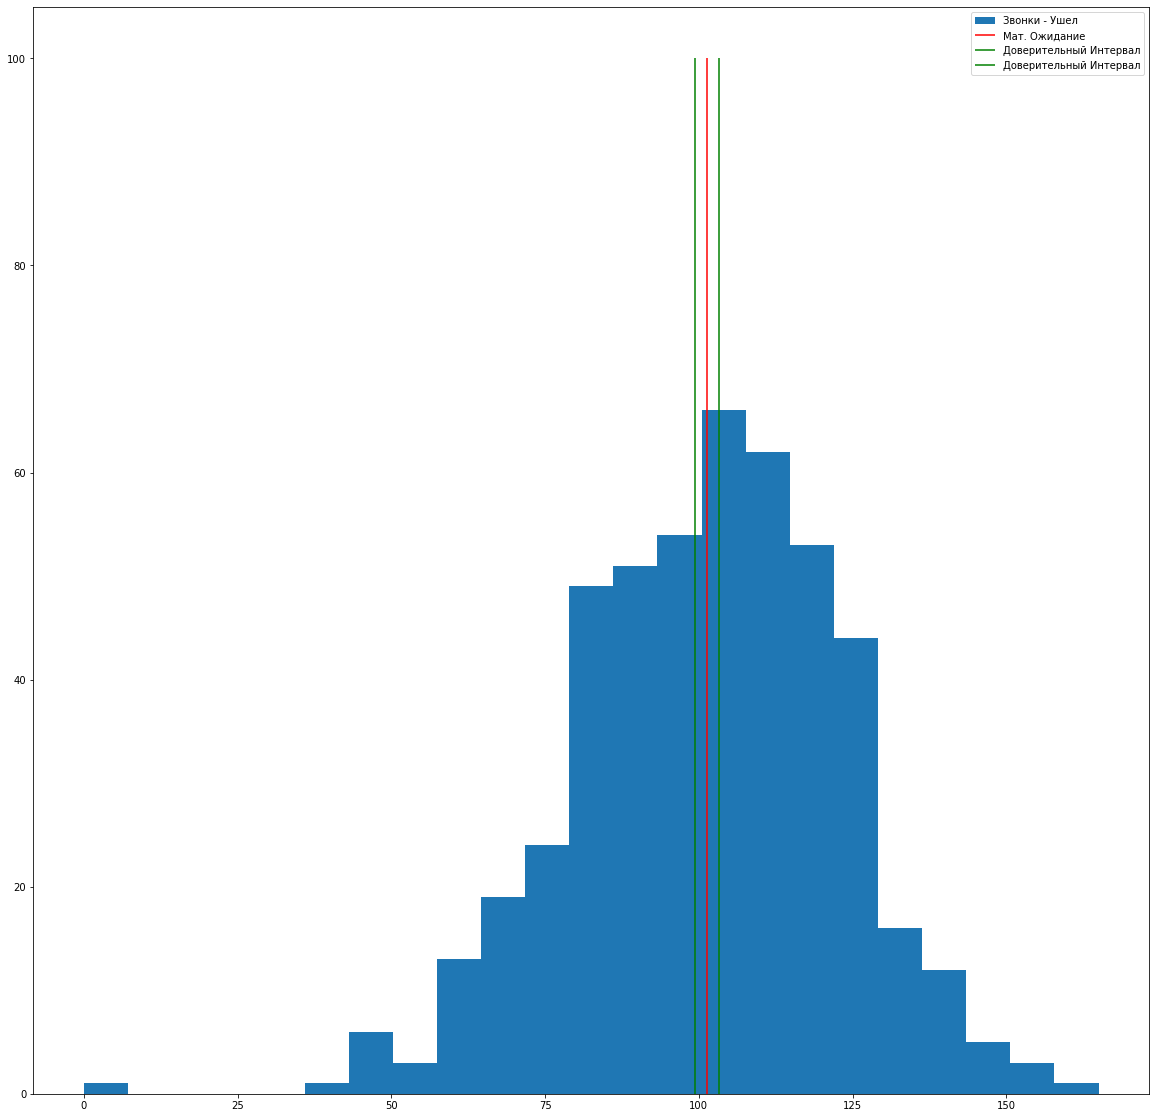

In [8]:
df_churn_true = df[(df['churn'] == True)]["total day calls"] # Отфильтруем данные по Фильтру 'Ушел'

df_mean = df_churn_true.mean() # Посчитаем Мат.Ожидание
df_var = df_churn_true.var() # Посчитаем Дисперсию
df_std = df_churn_true.std() # Посчитаем Стандартное Отклонение

print("Мат.Ожидание: {}".format(df_mean))
print("Дисперсия: {}".format(df_var))
print("Стандартное отклонение: {}".format(df_std))

# Посчитаем доверительные интервалы по стандартной формуле и готовым функциям
trust_interval_manual_begin = df_mean - 1.96 * df_std / np.sqrt(len(df_churn_true))
trust_interval_manual_end = df_mean + 1.96 * df_std / np.sqrt(len(df_churn_true))
trust_interval_norm = sts.norm.interval(alpha=0.95, loc=df_mean, scale=np.std(df_churn_true, ddof=1)/np.sqrt(len(df_churn_true)))
trust_interval_generic = ssw._zconfint_generic(df_mean,  np.std(df_churn_true, ddof=1), alpha=0.95, alternative='two-sided')

diff_begin = []
diff_begin.append(trust_interval_manual_begin)
diff_begin.append(trust_interval_norm[0])
diff_begin.append(trust_interval_generic[0])

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(trust_interval_manual_begin, trust_interval_manual_end))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(trust_interval_norm))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(trust_interval_generic))

print("Результат - разница между сформированными интервалами разными способами довольно незначительна и находится в пределах: {}"
      .format(np.var(diff_begin)))

#
plt.figure(figsize=(20,20))
plt.hist(df_churn_true, bins='auto', label='Звонки - Ушел');
plt.vlines(df_mean,0,100,color="red",label='Мат. Ожидание')
plt.vlines(trust_interval_manual_begin,0,100,color="green",label='Доверительный Интервал')
plt.vlines(trust_interval_manual_end,0,100,color="green",label='Доверительный Интервал')
plt.legend()

Мат.Ожидание: 100.28315789473685
Дисперсия: 392.08581663003537
Стандартное отклонение: 19.801156951805503
Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.55617497470149, 101.0101408147722] 
Доверительный интервал для среднего по цпт интервальная оценка: (99.55618833318324, 101.01012745629045) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 
Результат - разница между сформированными интервалами разными способами довольно незначительна и находится в пределах: 0.05886807165651195


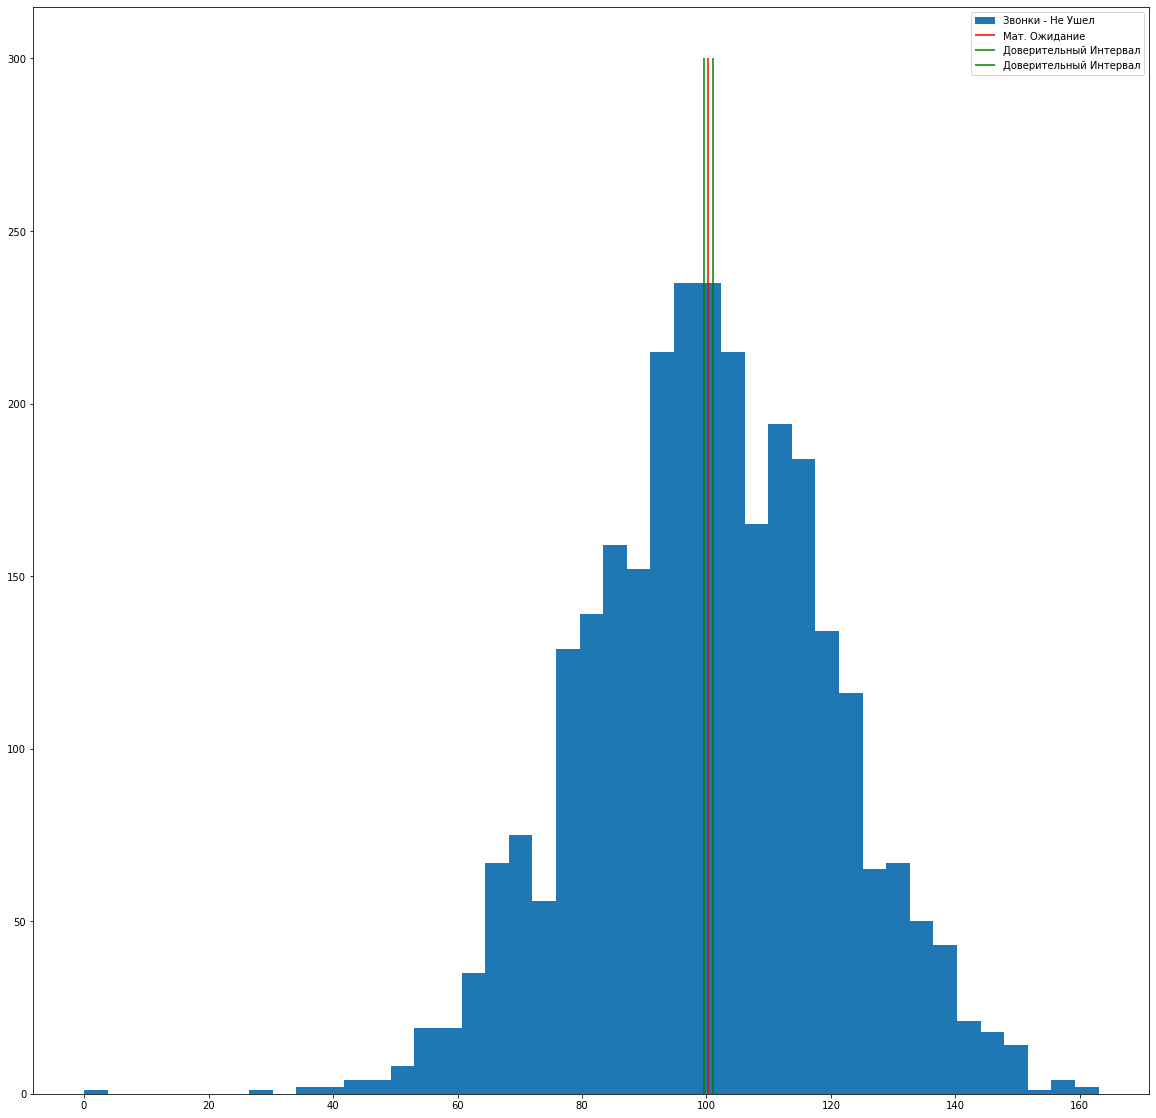

In [14]:
df_churn_false = df[(df['churn'] == False)]["total day calls"] # Отфильтруем данные по Фильтру 'Не Ушел'

df_mean = df_churn_false.mean() # Посчитаем Мат.Ожидание
df_var = df_churn_false.var() # Посчитаем Дисперсию
df_std = df_churn_false.std() # Посчитаем Стандартное Отклонение

print("Мат.Ожидание: {}".format(df_mean))
print("Дисперсия: {}".format(df_var))
print("Стандартное отклонение: {}".format(df_std))

# Посчитаем доверительные интервалы по стандартной формуле и готовым функциям
trust_interval_manual_begin = df_mean - 1.96 * df_std / np.sqrt(len(df_churn_false))
trust_interval_manual_end = df_mean + 1.96 * df_std / np.sqrt(len(df_churn_false))
trust_interval_norm = sts.norm.interval(alpha=0.95, loc=df_mean, scale=np.std(df_churn_false, ddof=1)/np.sqrt(len(df_churn_false)))
trust_interval_generic = ssw._zconfint_generic(df_mean,  np.std(df_churn_false, ddof=1), alpha=0.95, alternative='two-sided')

diff_begin = []
diff_begin.append(trust_interval_manual_begin)
diff_begin.append(trust_interval_norm[0])
diff_begin.append(trust_interval_generic[0])

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(trust_interval_manual_begin, trust_interval_manual_end))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(trust_interval_norm))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(trust_interval_generic))
print("Результат - разница между сформированными интервалами разными способами довольно незначительна и находится в пределах: {}"
      .format(np.var(diff_begin)))

plt.figure(figsize=(20,20))
plt.hist(df_churn_false, bins='auto',label='Звонки - Не Ушел');
plt.vlines(df_mean,0,300,color="red",label='Мат. Ожидание')
plt.vlines(trust_interval_manual_begin,0,300,color="green",label='Доверительный Интервал')
plt.vlines(trust_interval_manual_end,0,300,color="green",label='Доверительный Интервал')
plt.legend()